<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Exercices Global/DiabetesClassification.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

## Basic Data Science and ML Pipeline

## OSEMN Pipeline 
* O - Obtaining our data
* S - Scrubbing / Cleaning our data
* E - Exploring / Visualizing our data will allow us to find patterns and trends
* M - Modeling our data will give us our predictive power as a wizard
* N - INterpreting our data


For reference : https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_post_details%3BmDlg5VsdSBCLBps2R0vRZA%3D%3D

In [43]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Basic EDA and statistical analysis


In [44]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### The Question creeping out of this summary

#### Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

#### To fill these Nan values the data distribution needs to be understood

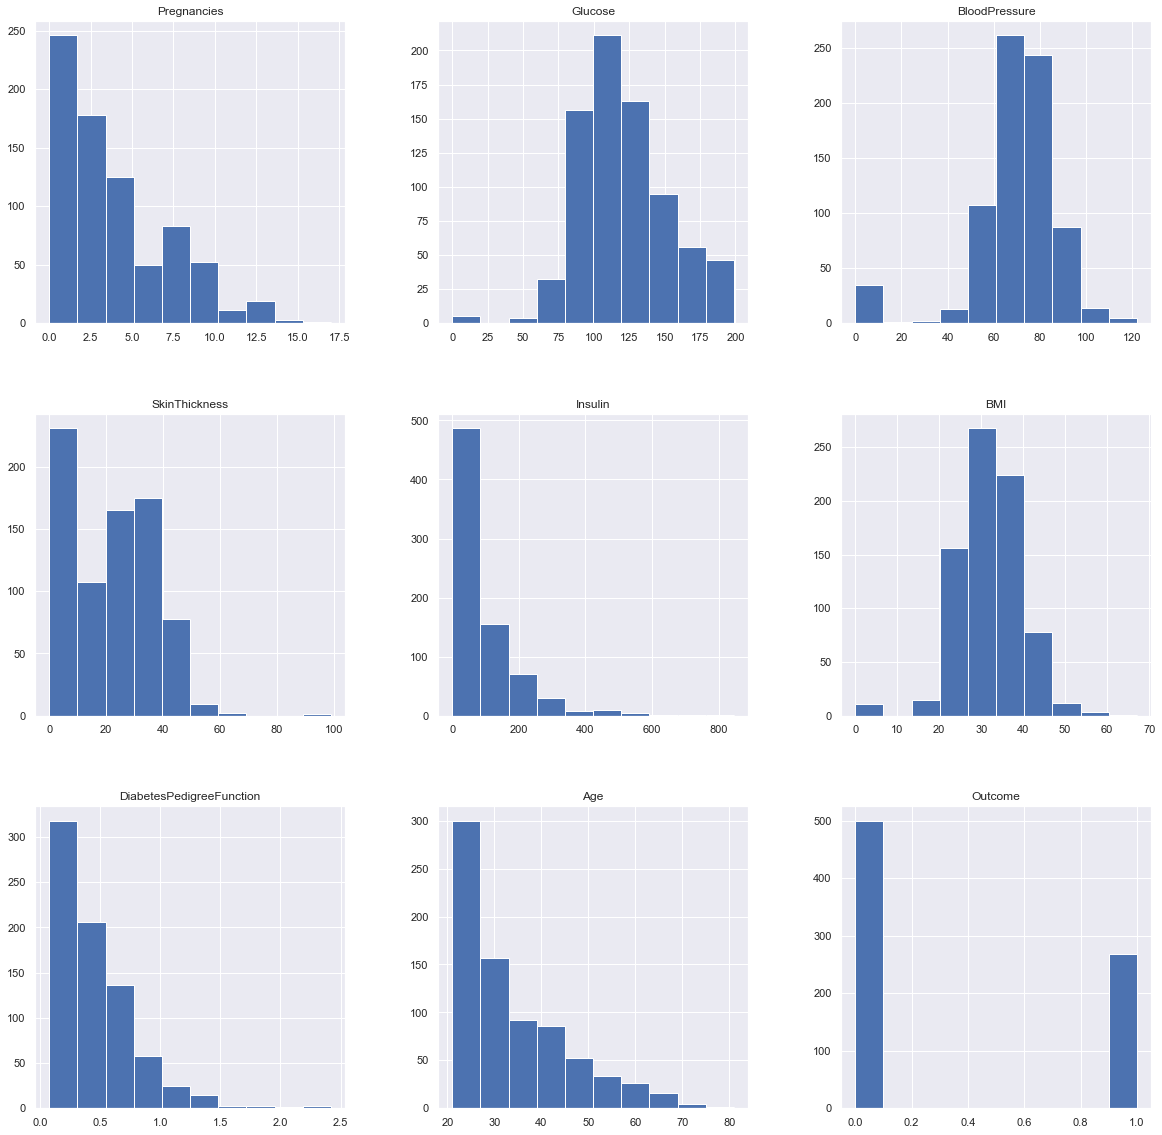

In [37]:
p = diabetes_data.hist(figsize = (20,20))

## Skewness

A ***left-skewed distribution*** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A ***right-skewed distribution*** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


![](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)


#### to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

In [40]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

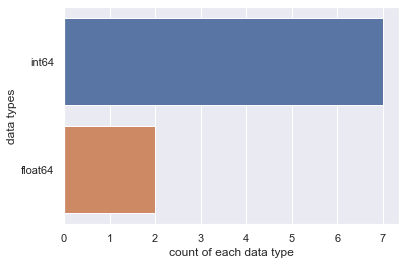

In [10]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

0    500
1    268
Name: Outcome, dtype: int64


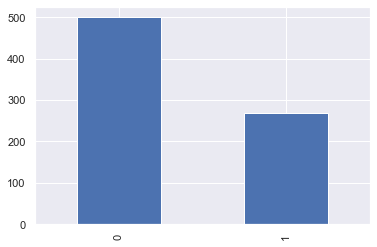

In [41]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")


#### The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

#### Pair plot for clean data

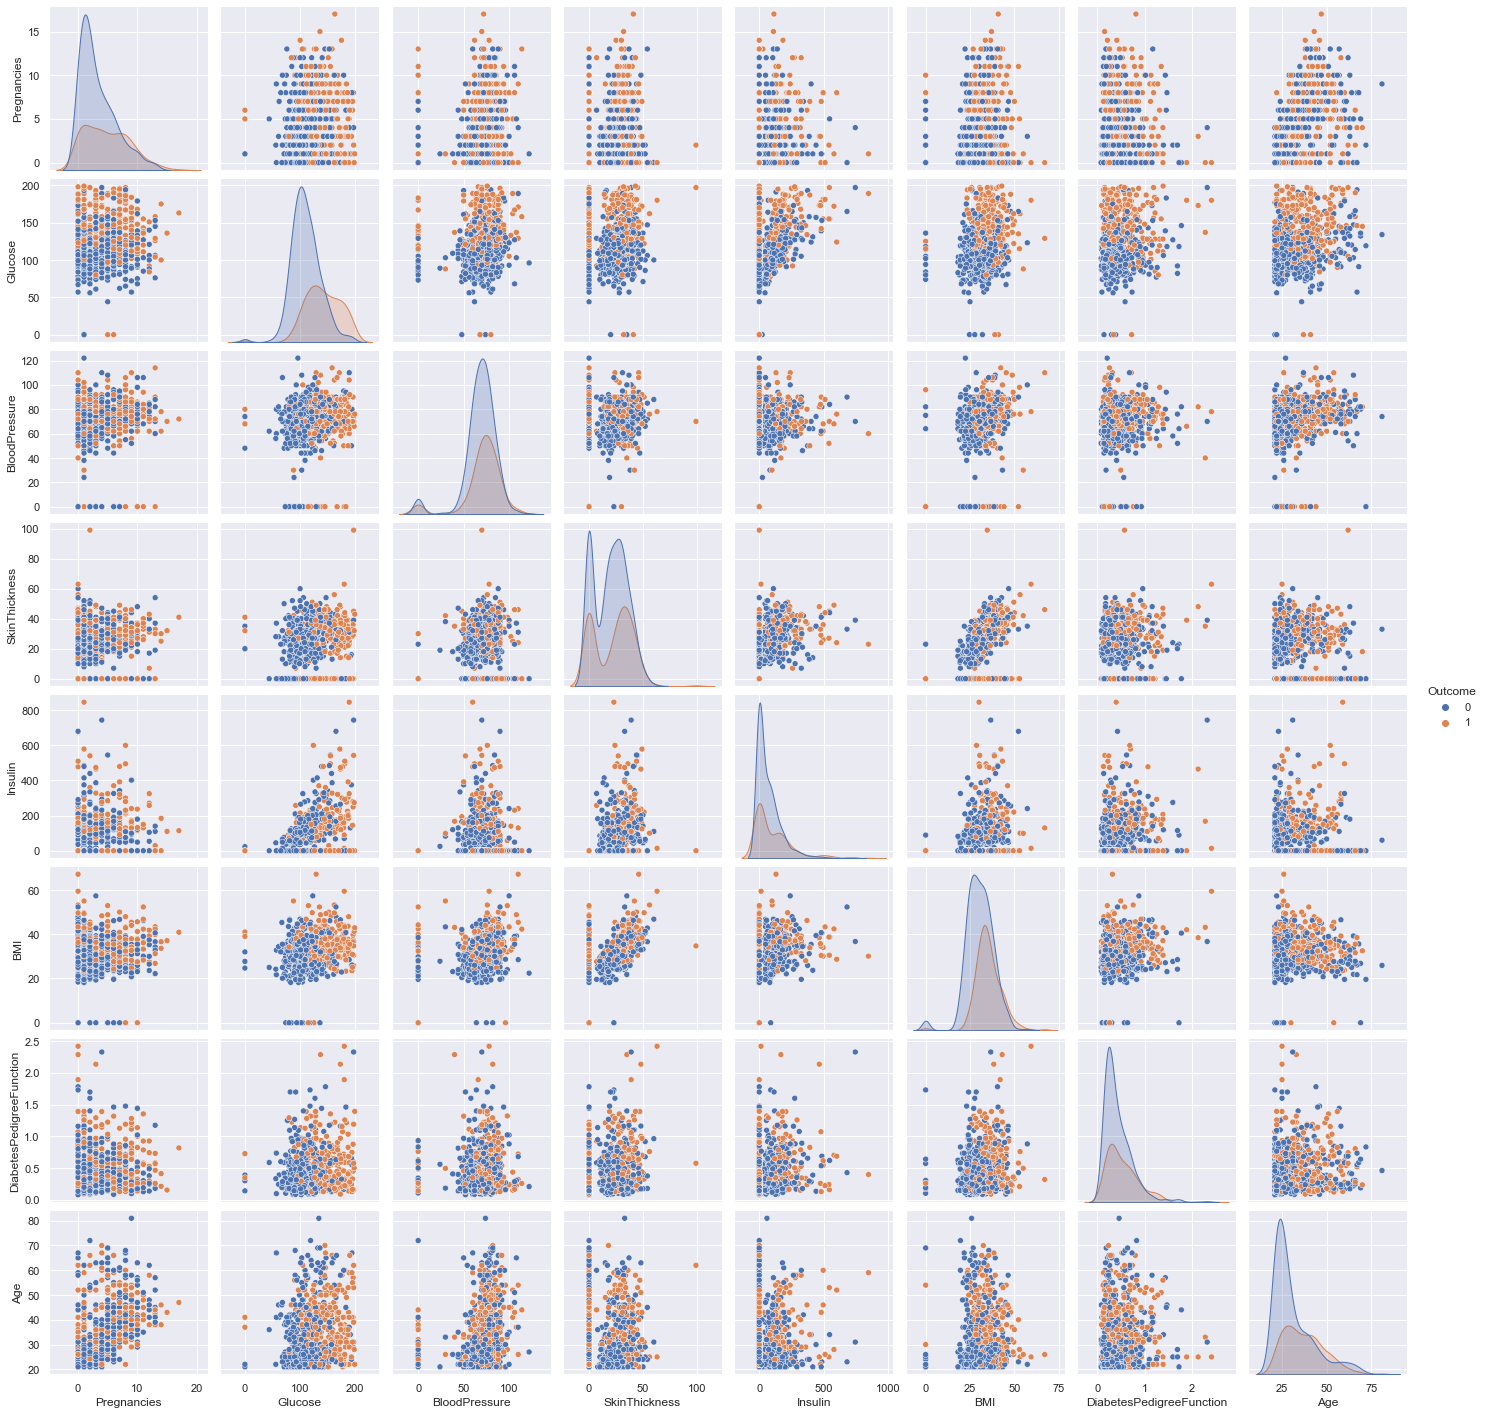

In [46]:
p=sns.pairplot(diabetes_data, hue = 'Outcome')

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

#### Heatmap for unclean data

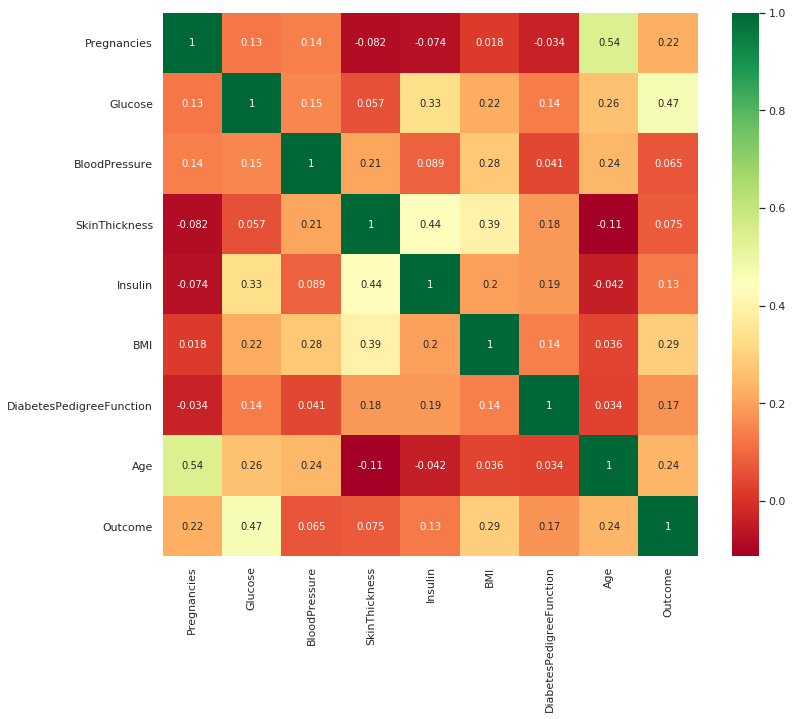

In [16]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

# Data preprocessing

In [120]:
df = diabetes_data.copy()
dfClean= diabetes_data.copy()

dfClean[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dfClean[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df =df.dropna(axis=0)
## showing the count of Nans
dfClean['Glucose'].fillna(dfClean['Glucose'].mean(), inplace = True)
dfClean['BloodPressure'].fillna(dfClean['BloodPressure'].mean(), inplace = True)
dfClean['SkinThickness'].fillna(dfClean['SkinThickness'].median(), inplace = True)
dfClean['Insulin'].fillna(dfClean['Insulin'].median(), inplace = True)
dfClean['BMI'].fillna(dfClean['BMI'].median(), inplace = True)

print(dfClean.isnull().sum())
print(df.isnull().sum())
print(df['Outcome'].value_counts())
print(dfClean['Outcome'].value_counts())
print(df.shape,dfClean.shape)
print(df.shape,dfClean.shape)

df = df.drop(['BloodPressure','SkinThickness'],1)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
0    262
1    130
Name: Outcome, dtype: int64
0    500
1    268
Name: Outcome, dtype: int64
(392, 9) (768, 9)
(392, 9) (768, 9)


In [121]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
#X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
#        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose',   'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
Xc =  pd.DataFrame(sc_X.fit_transform(dfClean.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [122]:
X.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.717427,-1.091046,-0.522842,-0.710421,-1.031876,-0.968299
1,-1.029213,0.466314,0.100631,1.426730,5.115111,0.209585
2,-0.093854,-1.447941,-0.573394,-0.297238,-0.797126,-0.477514
3,-0.405640,2.413014,3.260122,-0.368477,-1.057960,2.172726
4,-0.717427,2.153454,5.812990,-0.425468,-0.362402,2.761668


In [123]:
#X = diabetes_data.drop("Outcome",axis = 1)
y =df.Outcome
yc = dfClean.Outcome

In [124]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=42, stratify=y)
X_trainc,X_testc,y_trainc,y_testc = train_test_split(Xc,yc,test_size=0.8,random_state=42, stratify=yc)

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

    


In [126]:
from tqdm import tqdm
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in tqdm(range(len(models))):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
 
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

100%|██████████| 8/8 [00:02<00:00,  2.94it/s]


In [127]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regreesion,78.025478,75.892857,13.929716,0.719231,0.727273,0.538462,0.618785
3,GaussianNB,76.114650,76.785714,17.928429,0.721932,0.649485,0.605769,0.626866
1,SVM,75.796178,77.142857,14.677659,0.692857,0.684211,0.500000,0.577778
2,KNeighbors,74.840764,78.392857,16.930417,0.690568,0.650602,0.519231,0.577540
6,Random Forest,74.522293,72.857143,16.690459,0.710027,0.617647,0.605769,0.611650
4,BernoulliNB,73.885350,74.464286,14.683089,0.690705,0.619565,0.548077,0.581633
5,Decision Tree,72.929936,66.785714,17.608990,0.678709,0.604396,0.528846,0.564103
7,XGBoost,71.656051,71.607143,17.847319,0.674038,0.575758,0.548077,0.561576


In [67]:
from tqdm import tqdm
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in tqdm(range(len(models))):
    lst_2= []
    model = models[m][1]
    model.fit(X_trainc, y_trainc)
    y_pred = model.predict(X_testc)
    cm = confusion_matrix(y_testc, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_trainc, y = y_trainc, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_testc, y_pred)  #ROC AUC Score
    precision = precision_score(y_testc, y_pred)  #Precision Score
    recall = recall_score(y_testc, y_pred)  #Recall Score
    f1 = f1_score(y_testc, y_pred)  #F1 Score
 
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_testc, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

100%|██████████| 8/8 [00:03<00:00,  2.36it/s]


In [68]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regreesion,75.284553,82.458333,9.022445,0.729331,0.645161,0.651163,0.648148
1,SVM,74.959350,81.875000,10.043741,0.718227,0.650246,0.613953,0.631579
2,KNeighbors,73.658537,77.291667,9.809381,0.686715,0.654971,0.520930,0.580311
6,Random Forest,73.495935,77.208333,12.150746,0.704826,0.625000,0.604651,0.614657
7,XGBoost,73.495935,74.083333,12.835498,0.706977,0.622642,0.613953,0.618267
5,Decision Tree,72.682927,68.166667,14.389425,0.698576,0.610329,0.604651,0.607477
3,GaussianNB,71.869919,77.875000,10.846867,0.695552,0.593750,0.618605,0.605923
4,BernoulliNB,70.243902,76.625000,8.939321,0.698110,0.561069,0.683721,0.616352


In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [77]:
from sklearn.model_selection import ShuffleSplit,StratifiedKFold,LeaveOneOut
lst_1= []
modeles =[]

k=0
for i,j in tqdm(grid_models):
    lst_2= []
    cv =LeaveOneOut()
    grid = GridSearchCV(estimator=i,param_grid = j,scoring='precision',cv = cv)
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_pred = model.predict(X_test)
   
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = cv)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    
    modeles.append(model)
    lst_2.append(models[k][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)
    print(lst_2)
    k+=1

 12%|█▎        | 1/8 [00:03<00:21,  3.03s/it]

['Logistic Regreesion', 77.38853503184714, 79.48717948717949, 40.37952755903493, 0.7071886446886447, 0.726027397260274, 0.5096153846153846, 0.5988700564971752]


 25%|██▌       | 2/8 [00:09<00:24,  4.04s/it]

['SVM', 74.20382165605095, 76.92307692307693, 42.13250442347432, 0.6760989010989011, 0.6493506493506493, 0.4807692307692308, 0.5524861878453039]


 38%|███▊      | 3/8 [00:12<00:19,  3.89s/it]

['KNeighbors', 76.43312101910828, 76.92307692307693, 42.13250442347432, 0.6976190476190477, 0.7027027027027027, 0.5, 0.5842696629213484]


 50%|█████     | 4/8 [00:13<00:11,  2.95s/it]

['GaussianNB', 74.52229299363057, 78.2051282051282, 41.28523637975544, 0.7076007326007326, 0.62, 0.5961538461538461, 0.607843137254902]


 62%|██████▎   | 5/8 [00:15<00:07,  2.55s/it]

['BernoulliNB', 71.656050955414, 67.94871794871796, 46.667371085131535, 0.6837454212454213, 0.5700934579439252, 0.5865384615384616, 0.5781990521327014]


 75%|███████▌  | 6/8 [00:16<00:04,  2.14s/it]

['Decision Tree', 73.88535031847134, 75.64102564102564, 42.92479241739284, 0.7052655677655678, 0.6057692307692307, 0.6057692307692307, 0.6057692307692307]


 88%|████████▊ | 7/8 [02:52<00:48, 48.19s/it]

['Random Forest', 73.88535031847134, 74.35897435897436, 43.66509324596513, 0.6858516483516482, 0.625, 0.5288461538461539, 0.5729166666666667]


100%|██████████| 8/8 [03:16<00:00, 24.54s/it]

['XGBoost', 73.88535031847134, 75.64102564102564, 42.92479241739284, 0.6834249084249083, 0.627906976744186, 0.5192307692307693, 0.5684210526315789]


In [78]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regreesion,77.388535,79.487179,40.379528,0.707189,0.726027,0.509615,0.598870
2,KNeighbors,76.433121,76.923077,42.132504,0.697619,0.702703,0.500000,0.584270
3,GaussianNB,74.522293,78.205128,41.285236,0.707601,0.620000,0.596154,0.607843
1,SVM,74.203822,76.923077,42.132504,0.676099,0.649351,0.480769,0.552486
5,Decision Tree,73.885350,75.641026,42.924792,0.705266,0.605769,0.605769,0.605769
7,XGBoost,73.885350,75.641026,42.924792,0.683425,0.627907,0.519231,0.568421
6,Random Forest,73.885350,74.358974,43.665093,0.685852,0.625000,0.528846,0.572917
4,BernoulliNB,71.656051,67.948718,46.667371,0.683745,0.570093,0.586538,0.578199


In [81]:
for m in modeles:
    print(m)

LogisticRegression(C=0.25, random_state=0)
KNeighborsClassifier(metric='manhattan')
SVC(C=1, kernel='linear', random_state=0)
GaussianNB()
BernoulliNB(alpha=0.25)
DecisionTreeClassifier(criterion='entropy', random_state=0)
RandomForestClassifier(random_state=0)
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [88]:
grid_models = [(LogisticRegression(solver='liblinear'),[{'C':[0.25,0.5,0.75,1,1.5,2,3,4],'random_state':[0],"penalty":["l1","l2"]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':range(1,15), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]),
               ]

models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])


In [128]:
from sklearn.model_selection import ShuffleSplit,StratifiedKFold,LeaveOneOut
lst_1= []
modeles =[]

k=0
for i,j in tqdm(grid_models):
    lst_2= []
    cv =StratifiedKFold()
    grid = GridSearchCV(estimator=i,param_grid = j,scoring='f1',cv = cv)
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_pred = model.predict(X_test)
   
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = cv)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    
    modeles.append(model)
    lst_2.append(models[k][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)
    print(lst_2)
    k+=1

 33%|███▎      | 1/3 [00:00<00:01,  1.66it/s]

['Logistic Regreesion', 78.02547770700637, 79.41666666666667, 7.788880963698616, 0.7289377289377289, 0.7058823529411765, 0.5769230769230769, 0.634920634920635]


100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

['SVM', 76.75159235668791, 85.75, 6.7102740463991335, 0.6975732600732601, 0.7183098591549296, 0.49038461538461536, 0.5828571428571429]
['KNeighbors', 76.11464968152866, 77.91666666666667, 10.361520694913036, 0.7219322344322345, 0.6494845360824743, 0.6057692307692307, 0.6268656716417911]


In [94]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regreesion,76.114650,82.083333,4.594683,0.709799,0.666667,0.557692,0.607330
1,KNeighbors,74.522293,80.666667,7.474958,0.659066,0.700000,0.403846,0.512195
2,GaussianNB,74.522293,78.083333,5.537749,0.707601,0.620000,0.596154,0.607843


              precision    recall  f1-score   support

           0       0.81      0.88      0.84       210
           1       0.71      0.58      0.63       104

    accuracy                           0.78       314
   macro avg       0.76      0.73      0.74       314
weighted avg       0.77      0.78      0.77       314

ROC AUC score: 0.8428113553113553
Accuracy Score:  0.7802547770700637


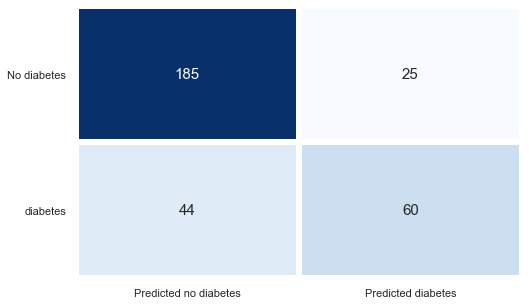

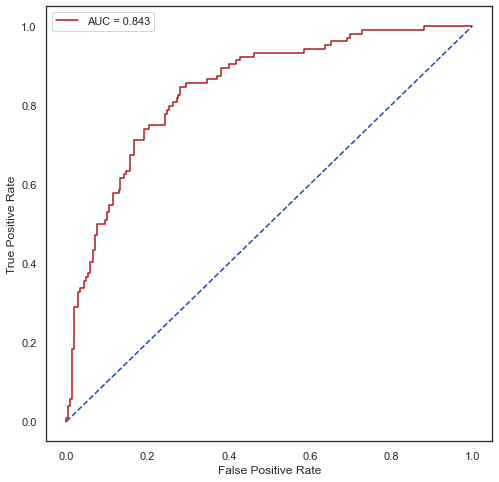

In [129]:

classifier = modeles[0]
#classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No diabetes', 'diabetes'], xticklabels = ['Predicted no diabetes', 'Predicted diabetes'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [102]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve

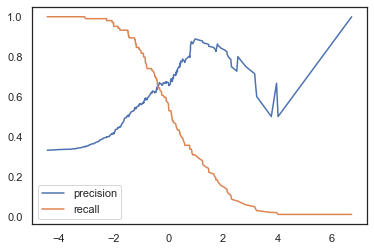

In [106]:
precision, recall, threshold = precision_recall_curve(y_test, modeles[0].decision_function(X_test))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

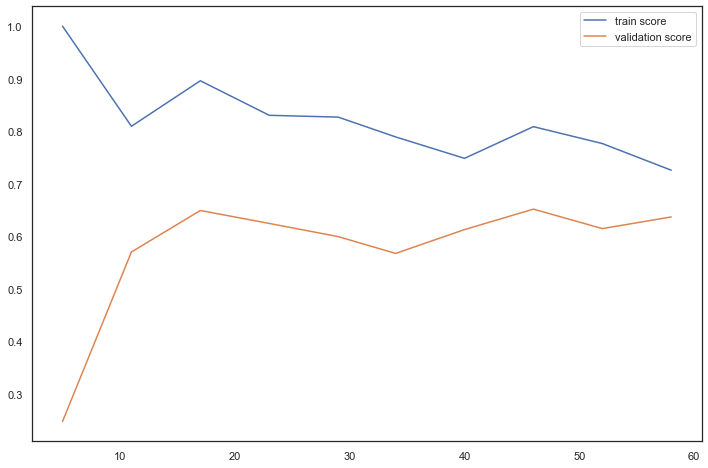

In [130]:
N, train_score, val_score = learning_curve(modeles[2], X_train, y_train,
                                            cv=4, scoring='f1',
                                            train_sizes=np.linspace(0.1, 1, 10))


plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

<AxesSubplot:>

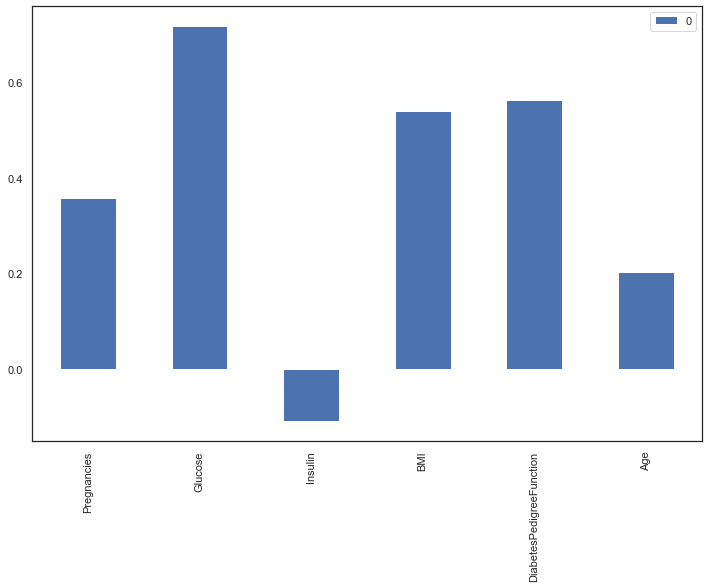

In [131]:
pd.DataFrame(modeles[0].coef_[0], index=X_train.columns).plot.bar(figsize=(12, 8))